In [1]:
import numpy as np 
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [2]:
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])

8
1
71
6


In [5]:
word_index = tokenizer.word_index

total_words = len(word_index) + 1   # 2690

In [6]:
input_sequences = []

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [7]:
input_sequences[:5]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2]]

In [8]:
# max length
max_sequence_len = max([len(x) for x in input_sequences])     # 16

max_sequence_len

16

In [9]:
# pad sequences 

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [10]:
input_sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 51, 12])

In [11]:
# create predictors and label

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

In [12]:
# categorize labels

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [13]:
print(xs[3])
print()
print(ys[3])

[   0    0    0    0    0    0    0    0    0    0    0   51   12   96
 1217]

[0. 0. 0. ... 0. 0. 0.]


In [14]:
embedding_dim = 100
embeddings_index = {}

with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

In [15]:
embeddings_matrix = np.zeros((total_words, embedding_dim))   # (138497, 100)

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [16]:
print(len(embeddings_matrix))

2690


#### Model

In [17]:
tf.keras.backend.clear_session()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_sequence_len, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              271690    
Total params: 638,070
Trainable params: 369,070
Non-trainable params: 269,000
_________________________________________________________________


In [19]:
adam = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [20]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 5s 6ms/step - loss: 6.8449 - accuracy: 0.0629
Epoch 2/100
377/377 [==============================] - 2s 6ms/step - loss: 6.2550 - accuracy: 0.0738
Epoch 3/100
377/377 [==============================] - 2s 6ms/step - loss: 6.0088 - accuracy: 0.0874
Epoch 4/100
377/377 [==============================] - 2s 7ms/step - loss: 5.7749 - accuracy: 0.1007
Epoch 5/100
377/377 [==============================] - 2s 6ms/step - loss: 5.5191 - accuracy: 0.1110
Epoch 6/100
377/377 [==============================] - 2s 6ms/step - loss: 5.3201 - accuracy: 0.1199
Epoch 7/100
377/377 [==============================] - 3s 7ms/step - loss: 5.1071 - accuracy: 0.1292
Epoch 8/100
377/377 [==============================] - 2s 6ms/step - loss: 4.9167 - accuracy: 0.1433
Epoch 9/100
377/377 [==============================] - 2s 6ms/step - loss: 4.7161 - accuracy: 0.1622
Epoch 10/100
377/377 [==============================] - 2s 6ms/step - loss: 4.6073 - accura

377/377 [==============================] - 2s 6ms/step - loss: 1.5771 - accuracy: 0.6012
Epoch 76/100
377/377 [==============================] - 2s 6ms/step - loss: 1.6505 - accuracy: 0.5918
Epoch 77/100
377/377 [==============================] - 3s 7ms/step - loss: 1.6589 - accuracy: 0.5862
Epoch 78/100
377/377 [==============================] - 3s 7ms/step - loss: 1.6431 - accuracy: 0.5851
Epoch 79/100
377/377 [==============================] - 3s 7ms/step - loss: 1.5445 - accuracy: 0.6098
Epoch 80/100
377/377 [==============================] - 2s 7ms/step - loss: 1.5506 - accuracy: 0.6088
Epoch 81/100
377/377 [==============================] - 3s 7ms/step - loss: 1.5103 - accuracy: 0.6131
Epoch 82/100
377/377 [==============================] - 3s 7ms/step - loss: 1.4202 - accuracy: 0.6325
Epoch 83/100
377/377 [==============================] - 3s 7ms/step - loss: 1.4742 - accuracy: 0.6257
Epoch 84/100
377/377 [==============================] - 3s 7ms/step - loss: 1.5402 - accuracy: 

#### Evaluate

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

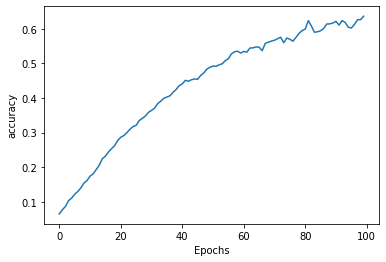

In [22]:
plot_graphs(history, 'accuracy')

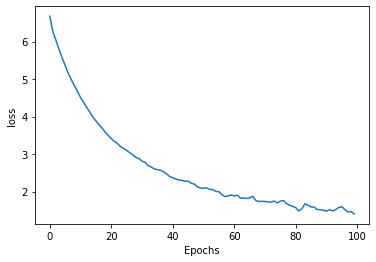

In [23]:
plot_graphs(history, 'loss')

#### Prediction

In [33]:
seed_text = "I've got a bad feeling about this"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

In [34]:
seed_text

"I've got a bad feeling about this night i was forced to my love in my love"

In [41]:
seed_text = "I've got a good feeling about this"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

In [42]:
seed_text

"I've got a good feeling about this night i was forced to the rose of tralee and"